At this point the summary statistics for all the variables in the dataset have been generated. Data Transformation of the categorical variables using the Label Encoder

function in scikit-learn has also been done. Finally, the missing values for the bmi variable have been imputed using the grouped means of the values of the other variables.

Note also that the only variable in this dataset with missing values is the bmi variable.

The dataset has been obtained from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Notes for version 3 of this file:

This .ipynb is an improvement on the previous iteration of DSI_project.ipynb. To avoid confusion the file name is not being changed this time since we are relying on git/github for the version control.

The new features in this file are as follows. First, although we have defined a lower cut-off value for the Age variable in each of the three dataframes (one each for stroke, hypertension, and heart disease we 

created) we had not defined an upper cut-off value. We do this here. We also define lower cut-off and upper cut-off values for the avg_glucose_level and bmi variables. The identification of lower cut-off and upper 

cut-off values for any of these three numerical variables may be explained by considering the age variable. The exact same procedure is being followed for avg_glucose_level and bmi.

The lower cut-off value for age is the smallest value of age for which we have an observation with stroke = 1. The upper cut-off value for age is the largest value of age for which we have an observation with stroke 

= 1. We do this for all three numerical variables (age, avg_glucose_level, and bmi) for each of the three new dataframes we created (one each for stroke, heart_disease and hypertension). A check is performed on each 

of the three newly created dataframes to see if any of the category variables have a level with no observation. If such a level exists it is dropped from that category variable.

Notes for version 2 of this file: 

This .ipynb file is an improved version of the DSI_project.ipynb. The following are the main differences:

 Grouped Median values have been used to do the BMI missing value imputation (and not Grouped Means which was used earlier). This is because the median is resistant to extreme values, while the mean 

 is sensitive to extreme values, and as seen in the boxplot of the BMI values we do have extreme values present in the BMI variable.

Only two classes, based on the median value, were used for constructing the categorical age and avg_glucose_level variables. This was done to prevent any need for a second round of imputation of 

missing values.

All observations corresponding to work_type = children were removed from the dataset. The rationale for doing this is that there are 687 such observations whereas there are only 3 such observations 

representing people with one of the three diseases (stroke, hypertension or heart disease) under consideration. No model will be able to classify a binary outcome 

variable with this kind of class disparity. One other thing to keep in mind is that stroke, heart disease, and hypertensions are diseases typically affecting the elderly. Children, in particular, 

are unlikely to get these diseases unless they have some abnormality, for example, some genetic abnormality. Since we do not have any genetic information in this dataset, and since the number of 

children with the diseases of interest is very small it is best to get rid of all such observations.

The single observation corresponding to Gender = Other was removed from the dataset. This observation is uninteresting because the person corresponding to it does not have any of the three diseases 

under consideration and because by being an 'orphan observation' no model will be able to classify such a model correctly. 

Finally, three different dataframes were created--one each for stroke, hypertension, and heart disease. The dataframe for stroke comprised of all observations in the original dataframe, once the 

work_type = children observations have been removed, with the additional condition that only those observations were retained where the age was equal to or greater than the minimum age of anyone 

with stroke in the dataset. A similar procedure was adopted in the creation of the hypertension and heart disease dataframes.

All three dataframes were then written to .csv files (one .csv file per dataframe) to be used for further analysis. 





In [189]:
!pip install imbalanced-learn
!pip install xgboost
!pip install graphviz

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [97]:
df = pd.read_csv("C:/Users/poula/Downloads/rawdata.csv")
print (df.head(6))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  for

In [98]:
#checking for missing values
print (df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [99]:
#select all columns except the first since the id variable is irrelevant for meaningful predictions of any appropriate outcome variable in this dataset

df = df.iloc[:, 1:] 
print (df.head(6))

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   
5    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
5          Urban             186.21  29.0  formerly s

In [100]:
print (df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [101]:
# Convert multiple object columns to category
df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']] = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']].astype('category')

# Check the data types
print(df.dtypes)

gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object


In [102]:
# Select all category variables in this dataset and obtain the counts of each levels of those variables.
category_columns = df.select_dtypes(include='category').columns

for col in category_columns:
    print(f"\nCount of each level in '{col}':")
    counts = df[col].value_counts()
    for category, count in counts.items():
        print(f"{category}: {count}")


Count of each level in 'gender':
Female: 2994
Male: 2115
Other: 1

Count of each level in 'ever_married':
Yes: 3353
No: 1757

Count of each level in 'work_type':
Private: 2925
Self-employed: 819
children: 687
Govt_job: 657
Never_worked: 22

Count of each level in 'Residence_type':
Urban: 2596
Rural: 2514

Count of each level in 'smoking_status':
never smoked: 1892
Unknown: 1544
formerly smoked: 885
smokes: 789


In [103]:
#select all numerical variables in this dataset and obtain their summary statistics

numeric_columns = df.select_dtypes(include=['float64']).columns
print(df[numeric_columns].describe())


               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  4909.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.854067
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.500000
50%      45.000000          91.885000    28.100000
75%      61.000000         114.090000    33.100000
max      82.000000         271.740000    97.600000


In [104]:
#Obtain the count information for the values in the stroke, hypertension, and  heart_disease variables

def get_counts(df, column_name):
    # Convert the column_name type to int64, handling potential errors
    df[column_name] = pd.to_numeric(df[column_name], errors='raise').astype('int64')
    
    #calculate the value counts and sort by index which will be the column_name values.
    value_counts = df[column_name].value_counts().sort_index()
    print(f"Frequency counts for '{column_name}':\n{value_counts}\n")

get_counts(df,'stroke')
get_counts(df, 'hypertension')
get_counts(df, 'heart_disease')

Frequency counts for 'stroke':
stroke
0    4861
1     249
Name: count, dtype: int64

Frequency counts for 'hypertension':
hypertension
0    4612
1     498
Name: count, dtype: int64

Frequency counts for 'heart_disease':
heart_disease
0    4834
1     276
Name: count, dtype: int64



In [105]:
#avg_glucose_level
'''
# Define the bins and labels
bins = [50, 120, 190, float('inf')]
labels = [1, 2, 3]

# Create the 'avg_glucose_level_temp' column using pd.cut
df['avg_glucose_level_temp_cat'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df['avg_glucose_level_temp'] = label_encoder.fit_transform(df['avg_glucose_level_temp_cat']) + 1 # +1 to match the original labels

df.drop('avg_glucose_level_temp_cat', axis=1, inplace=True)
# Print the DataFrame with the new categorical column
print(df.head(3))'
'''


"\n# Define the bins and labels\nbins = [50, 120, 190, float('inf')]\nlabels = [1, 2, 3]\n\n# Create the 'avg_glucose_level_temp' column using pd.cut\ndf['avg_glucose_level_temp_cat'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)\n\n# Initialize LabelEncoder\nlabel_encoder = LabelEncoder()\n\n# Fit and transform the categorical column\ndf['avg_glucose_level_temp'] = label_encoder.fit_transform(df['avg_glucose_level_temp_cat']) + 1 # +1 to match the original labels\n\ndf.drop('avg_glucose_level_temp_cat', axis=1, inplace=True)\n# Print the DataFrame with the new categorical column\nprint(df.head(3))'\n"

In [106]:
#Obtain the frequency counts of the newly created variables Age_temp and avg_glucose_level_temp
'''
get_counts(df,'Age_temp')
get_counts(df, 'avg_glucose_level_temp')'
'''

"\nget_counts(df,'Age_temp')\nget_counts(df, 'avg_glucose_level_temp')'\n"

In [107]:
#Gender variable
#Transform the Gender variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'gender' column
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
get_counts(df,'gender_encoded')

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Gender Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")

Frequency counts for 'gender_encoded':
gender_encoded
0    2994
1    2115
2       1
Name: count, dtype: int64

Gender Mapping:
Female: 0
Male: 1
Other: 2


In [108]:
#Filtering
# Filter rows where Gender is 'Other'
other_gender_rows = df[df['gender'] == 'Other']
print (other_gender_rows)

     gender   age  hypertension  heart_disease ever_married work_type  \
3116  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
3116          Rural             143.33  22.4  formerly smoked       0   

      gender_encoded  
3116               2  


To simplify our problem we can assume that our prediction model will only work for males and females. This is necessary because we do not have a single positive outcome variable (presence of 

stroke, heart disease, or hypertension) in our dataset for people who identify as 'Other' when it comes to gender. On this basis we drop the observation corresponding to 'Other' as gender.

In [109]:
df = df.drop(df[df['gender'] == 'Other'].index) #Drop rows where Gender is 'Other'
get_counts(df,'gender_encoded')


Frequency counts for 'gender_encoded':
gender_encoded
0    2994
1    2115
Name: count, dtype: int64



In [110]:
#print (df['gender'].cat.categories)
#drop the Gender = Other category from the gender variable
df['gender'] = df['gender'].cat.remove_categories('Other')
print (df['gender'].cat.categories)


Index(['Female', 'Male'], dtype='object')


In [111]:
#ever_married
#Transform the ever_married variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'ever_married' column
df['ever_married_encoded'] = label_encoder.fit_transform(df['ever_married'])

# Print the DataFrame with the new encoded column
print(df.head(3))

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("ever_married Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21   NaN     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   gender_encoded  ever_married_encoded  
0               1                     1  
1               0                     1  
2               1                     1  
ever_married Mapping:
No: 0
Yes: 1


In [112]:
#Worktype
print (df['work_type'].cat.categories)
df_children = df[ (df['work_type'] == 'children')] 
df_children.to_csv('stroke_data_children.csv', index = False)

#show all observations when work_type is children and any of hypertension, heart_disease, and 'stroke' is 1
filtered_df = df[
    (df['work_type'] == 'children') &
   ( (df['stroke'] == 1) |
    (df['hypertension'] == 1) |
    (df['heart_disease'] == 1)
   )
]

# Print the filtered observations
print(filtered_df)



Index(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'], dtype='object')
      gender    age  hypertension  heart_disease ever_married work_type  \
162   Female   1.32             0              0           No  children   
245   Female  14.00             0              0           No  children   
3031    Male   2.00             0              1           No  children   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  \
162           Urban              70.37   NaN        Unknown       1   
245           Rural              57.93  30.9        Unknown       1   
3031          Urban              62.89  29.4        Unknown       0   

      gender_encoded  ever_married_encoded  
162                0                     0  
245                0                     0  
3031               1                     0  


In [113]:
#Remove the children level from variable work_type
df = df.drop(df[df['work_type'] == 'children'].index)
print (df[df['work_type'] == 'children'])


Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke, gender_encoded, ever_married_encoded]
Index: []


In [114]:
# Drop the 'children' level from the 'work_type' category
df['work_type'] = df['work_type'].cat.remove_categories('children')
print (df['work_type'].cat.categories)

Index(['Govt_job', 'Never_worked', 'Private', 'Self-employed'], dtype='object')


In [115]:
print (df.shape) #4,422 observations at this time in df dataframe

(4422, 13)


In [116]:
#Work type encoding

#Transform the Work type variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'work_type' column
df['work_type_encoded'] = label_encoder.fit_transform(df['work_type'])

# Print the DataFrame with the new encoded column
print(df.head(3))



# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("work_type Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")




   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21   NaN     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   gender_encoded  ever_married_encoded  work_type_encoded  
0               1                     1                  2  
1               0                     1                  3  
2               1                     1                  2  
work_type Mapping:
Govt_job: 0
Never_worked: 1
Private: 2
Self-employed: 3


In [117]:
#Residence type

#Transform the Residence type variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Residence_type' column
df['Residence_type_encoded'] = label_encoder.fit_transform(df['Residence_type'])

# Print the DataFrame with the new encoded column
print(df.head(3))

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Residence_type Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")



   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21   NaN     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   gender_encoded  ever_married_encoded  work_type_encoded  \
0               1                     1                  2   
1               0                     1                  3   
2               1                     1                  2   

   Residence_type_encoded  
0                       1  
1                       0  
2                       0  
Residence_type Mapping:
Rural: 0
Urban: 1


In [118]:
#smoking status
#Transform the smoking status variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'smoking_status' column
df['smoking_status_encoded'] = label_encoder.fit_transform(df['smoking_status'])

# Print the DataFrame with the new encoded column
print(df.head(3))

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Residence_type Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21   NaN     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   gender_encoded  ever_married_encoded  work_type_encoded  \
0               1                     1                  2   
1               0                     1                  3   
2               1                     1                  2   

   Residence_type_encoded  smoking_status_encoded  
0                       1                       1  
1                       0                       2  
2        

In [119]:
print (df.dtypes)

gender                    category
age                        float64
hypertension                 int64
heart_disease                int64
ever_married              category
work_type                 category
Residence_type            category
avg_glucose_level          float64
bmi                        float64
smoking_status            category
stroke                       int64
gender_encoded               int64
ever_married_encoded         int32
work_type_encoded            int32
Residence_type_encoded       int32
smoking_status_encoded       int32
dtype: object


In [120]:
#Age
#Give summary statistics for ALL people in this dataset
print(df['age'].describe())
print()




count    4422.000000
mean       48.883311
std        18.706121
min         7.000000
25%        34.000000
50%        49.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64



In [121]:
#obtain and print the 10 youngest people in this dataset with EITHER hypertension, heart disease OR stroke
df_disease = df[ ((df['stroke'] == 1) | (df['heart_disease'] == 1) | (df['hypertension'] == 1))]
age_disease_youngest_10 = df_disease.nsmallest(10, 'age')
#print observations for youngest 10 with any of the three diseases
print ( df_disease.sort_values(by='age').head(10))

      gender   age  hypertension  heart_disease ever_married work_type  \
2128    Male  17.0             1              0           No   Private   
2387  Female  19.0             1              0           No   Private   
1554  Female  22.0             1              0           No   Private   
928   Female  23.0             1              0           No   Private   
2083  Female  24.0             1              0           No   Private   
1746    Male  24.0             1              0          Yes   Private   
2949  Female  26.0             1              0          Yes   Private   
3667  Female  28.0             1              0          Yes  Govt_job   
3885  Female  28.0             0              1          Yes   Private   
715   Female  28.0             1              0           No   Private   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  \
2128          Rural              61.67  97.6        Unknown       0   
2387          Rural              65.96  29.

In [122]:
#Hypertension
#df_hypertension_only contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that hypertension = 1 (present)
df_hypertension_only = df_disease[df_disease['hypertension'] == 1]
print (df_hypertension_only.shape)

(498, 16)


In [123]:
hypertension_min_age = df_hypertension_only['age'].min()
print (hypertension_min_age)
#print (df_hypertension_only.head(3))


17.0


In [124]:
#df_hypertension_full contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that the age value should be greater or equal to the minimum age of any person in this dataset with hypertension.
df_hypertension_full = df[df['age'] >= hypertension_min_age].copy() #making an explicit copy of the sliced dataframe
print (df_hypertension_full.shape) 

(4313, 16)


In [125]:
#Heart disease
#df_heart_disease_only contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that heart_disease = 1 (present)
df_heart_disease_only = df_disease[df_disease['heart_disease'] == 1]
print (df_heart_disease_only.shape)

(275, 16)


In [126]:
heart_disease_min_age = df_heart_disease_only['age'].min()
print (heart_disease_min_age)


28.0


In [127]:
#df_heart_disease_full contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that the age value should be greater or equal to the minimum age of any person in this dataset with heart disease.
df_heart_disease_full = df[df['age'] >= heart_disease_min_age].copy() #making an explicit copy of the sliced dataframe
print (df_heart_disease_full.shape) 

(3700, 16)


In [128]:
#Stroke
#df_stroke_only contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that stroke = 1 (present)
df_stroke_only = df_disease[df_disease['stroke'] == 1]
print (df_stroke_only.shape)

(247, 16)


In [129]:
stroke_min_age = df_stroke_only['age'].min()
print (stroke_min_age)

32.0


In [130]:
#df_stroke_full contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that the age value should be greater or equal to the minimum age of any person in this dataset with stroke.
df_stroke_full = df[df['age'] >= stroke_min_age].copy() #making an explicit copy of the sliced dataframe
print (df_stroke_full.shape) 

(3461, 16)


In [131]:
#This function creates a categorical age variable based on the median age with the dataframe it receives as an argument.
#(One of the variables in the dataframe argument must be age.) It then returns the modified dataframe.
def create_age_category(df, age_column='age', category_name='Age_temp_cat'):
    median_age = round(df[age_column].median())
    print("Median Age:", median_age)

    bins = [0, median_age, df[age_column].max() + 1]
    labels = [0, 1]

    df[category_name] = pd.cut(df[age_column], bins=bins, labels=labels, right=False)
    return df



In [132]:
#This function encodes a categorical age variable in a dataframe using LabelEncoder.
#It then drops the categorical age variable and returns the modified dataframe.
def encode_age_category(df, category_name='Age_temp_cat', encoded_name='Age_temp'):
    encoder = LabelEncoder()
    df[encoded_name] = encoder.fit_transform(df[category_name])
    df.drop(category_name, axis=1, inplace=True)
    return df

In [133]:
#Creates a categorical glucose level column based on the median glucose level and 
#returns the modified dataframe
def create_glucose_category(df, glucose_column='avg_glucose_level', category_name='avg_glucose_level_temp_cat'):
    median_glucose = round(df[glucose_column].median())
    print("Median Avg Glucose Level:", median_glucose)

    bins = [0, median_glucose, df[glucose_column].max() + 1]
    labels = [0, 1]

    df[category_name] = pd.cut(df[glucose_column], bins=bins, labels=labels, right=False)
    return df



In [134]:
# Encodes the categorical glucose level column using LabelEncoder and
# returns the modified dataframe
def encode_glucose_category(df, category_name='avg_glucose_level_temp_cat', encoded_name='avg_glucose_level_temp'):
    label_encoder = LabelEncoder()
    df[encoded_name] = label_encoder.fit_transform(df[category_name]) + 1  # +1 to match the original labels
    df.drop(category_name, axis=1, inplace=True)
    return df

In [135]:
#  Imputes missing BMI values using grouped medians based on other relevant variables in this dataframe. 
def impute_bmi_with_grouped_medians(df):
     # Identify the variables to group by
    grouping_columns = [
                         'gender_encoded',
                         'work_type_encoded',
                        'Residence_type_encoded', 'smoking_status_encoded',
                        'Age_temp' , 'avg_glucose_level_temp'
                        ]
    # Calculate grouped medians
    grouped_medians = df.groupby(grouping_columns)['bmi'].transform('median')

     # Impute missing values
    df['bmi'] = df['bmi'].fillna(grouped_medians)
    return (df)


In [136]:
 #prints observations with missing BMI values in a DataFrame.
def print_missing_bmi_rows(df, bmi_column='bmi'):
    missing_bmi_rows = df[df[bmi_column].isnull()]
    if not missing_bmi_rows.empty:
        print("Rows with missing BMI values:")
        print(missing_bmi_rows)
    else:
        print("No missing BMI values found.")

In [137]:
#computes the minimum and maximum values of a numerical variable in a pandas dataframe and returns them
def get_min_max_values(df, numerical_variable):
    if numerical_variable not in df.columns:
        print(f"Error: Column '{numerical_variable}' not found in the dataframe")
        

    try:
        min_value = df[numerical_variable].min()
        max_value = df[numerical_variable].max()
        return min_value, max_value
    except TypeError:
        print(f"Error: Column '{numerical_variable}' is not numeric.")
        


**Code relevant to Stroke Dataframe only follows:**

In [138]:
# Create the Age_temp_cat column
df_stroke_full = create_age_category(df_stroke_full)

# Encode the Age_temp_cat column
df_stroke_full = encode_age_category(df_stroke_full)

print (df_stroke_full.head(3))


Median Age: 55
   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21   NaN     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   gender_encoded  ever_married_encoded  work_type_encoded  \
0               1                     1                  2   
1               0                     1                  3   
2               1                     1                  2   

   Residence_type_encoded  smoking_status_encoded  Age_temp  
0                       1                       1         1  
1                       0 

In [139]:
# Create the avg_glucose_level_temp_cat column
df_stroke_full = create_glucose_category(df_stroke_full)

# Encode the avg_glucose_level_temp_cat column
df_stroke_full = encode_glucose_category(df_stroke_full)

Median Avg Glucose Level: 94


In [140]:


# Impute missing BMI values
df_stroke_full = impute_bmi_with_grouped_medians(df_stroke_full)
print (df_stroke_full.head(3))


    



   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21  28.8     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   gender_encoded  ever_married_encoded  work_type_encoded  \
0               1                     1                  2   
1               0                     1                  3   
2               1                     1                  2   

   Residence_type_encoded  smoking_status_encoded  Age_temp  \
0                       1                       1         1   
1                       0              

In [141]:
#checking for presence of missing values
print (df_stroke_full.isnull().sum())

gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       0
smoking_status            0
stroke                    0
gender_encoded            0
ever_married_encoded      0
work_type_encoded         0
Residence_type_encoded    0
smoking_status_encoded    0
Age_temp                  0
avg_glucose_level_temp    0
dtype: int64


In [142]:
# Print observations with missing BMI values
print_missing_bmi_rows(df_stroke_full)


No missing BMI values found.


We will now do further filtering on the stroke dataframe to improve the quality of the data in this dataframe. The basis of this further filtering will be that we only wish to retain observations that are within the  

**feature space** of stroke = 1. Let us consider the age variable to begin with. We will only retain observations that are within the smallest and largest values of age for which we have a positive observation with

 respect to stroke (stroke = 1). We already ensured that the cut-off criterion for the lowest age is being satisfied. Now let us ensure that the cut-off criterion for the largest age value is also being satisfied.



In [143]:
print (df_stroke_full.dtypes)

gender                    category
age                        float64
hypertension                 int64
heart_disease                int64
ever_married              category
work_type                 category
Residence_type            category
avg_glucose_level          float64
bmi                        float64
smoking_status            category
stroke                       int64
gender_encoded               int64
ever_married_encoded         int32
work_type_encoded            int32
Residence_type_encoded       int32
smoking_status_encoded       int32
Age_temp                     int64
avg_glucose_level_temp       int64
dtype: object


In [144]:
#Obtain minimum and maximum values of age in df_stroke_full
stroke_all_min_age, stroke_all_max_age = get_min_max_values(df_stroke_full, 'age')
print (stroke_all_min_age, stroke_all_max_age)

32.0 82.0


In [145]:
#checking for minimum age criterion
#stroke_all_min_age = df_stroke_full['age'].min()
#print (stroke_all_min_age)
print()
print()
stroke_yes_min_age = df_stroke_full[df_stroke_full['stroke'] == 1]['age'].min()
print (stroke_yes_min_age)




32.0


In [146]:
#checking for maximum age criterion

#stroke_all_max_age = df_stroke_full['age'].max()
#print (stroke_all_max_age)
print()
print()
stroke_yes_max_age = df_stroke_full[df_stroke_full['stroke'] == 1]['age'].max()
print (stroke_yes_max_age)




82.0


In [147]:
#After checking for the age cut-off
df_stroke_full.shape

(3461, 18)

We have confirmed that the cut-offs for the minimum and maximum age values in the df_stroke_full data are being satisfied with respect to the feature space of the age predictor. Let us now perform a similar check on 

the avg_glucose_level predictor. 

In [148]:
#Obtain minimum and maximum values of avg_glucose_level in df_stroke_full
stroke_all_min_avg_glucose_level, stroke_all_max_avg_glucose_level = get_min_max_values(df_stroke_full, 'avg_glucose_level')
print (stroke_all_min_avg_glucose_level, stroke_all_max_avg_glucose_level)

55.22 271.74


In [149]:
#checking for minimum avg_glucose_level
#stroke_all_min_avg_glucose_level = df_stroke_full['avg_glucose_level'].min()
#print (stroke_all_min_avg_glucose_level)
print()
print()
stroke_yes_min_avg_glucose_level = df_stroke_full[df_stroke_full['stroke'] == 1]['avg_glucose_level'].min()
print (stroke_yes_min_avg_glucose_level)




56.11


In [150]:
#checking for maximum avg_glucose_level
#stroke_all_max_avg_glucose_level = df_stroke_full['avg_glucose_level'].max()
#print (stroke_all_max_avg_glucose_level)
print()
print()
stroke_yes_max_avg_glucose_level = df_stroke_full[df_stroke_full['stroke'] == 1]['avg_glucose_level'].max()
print (stroke_yes_max_avg_glucose_level)



271.74


While the maximum avg_glucose_level cut-off is being satisfied, the minimum avg_glucose_level cut-off is not being satisfied. We will have to do filtering to ensure that the minimum age value of any observation in 

the stroke dataframe for avg_glucose_level is 56.11.

Let us now perform a similar check on the BMI values

In [151]:
stroke_all_min_bmi, stroke_all_max_bmi = get_min_max_values(df_stroke_full, 'bmi')
print (stroke_all_min_bmi, stroke_all_max_bmi)

11.3 92.0


In [152]:
#checking for minimum bmi
#stroke_all_min_bmi = df_stroke_full['bmi'].min()
#print (stroke_all_min_bmi)
print()
print()
stroke_yes_min_bmi = df_stroke_full[df_stroke_full['stroke'] == 1]['bmi'].min()
print (stroke_yes_min_bmi)



16.9


In [153]:
#checking for maximum bmi
#stroke_all_max_bmi = df_stroke_full['bmi'].max()
#print (stroke_all_max_bmi)
print()
print()
stroke_yes_max_bmi = df_stroke_full[df_stroke_full['stroke'] == 1]['bmi'].max()
print (stroke_yes_max_bmi)



56.6


We note that the lower and upper cut-off values for bmi in the df_stroke_full dataframe for observations with stroke = 1 is 16.9 and 56.6 while the lower and upper cut-off values for all observations in this 

dataframe is 11.3 and 92. We will need to ensure that the stroke dataframe has bmi values between 16.9 and 56.6. Let us filter the df_stroke_full dataframe to improve its quality for the purpose of modelling.

In [154]:
df_stroke_full = df_stroke_full[
    (df_stroke_full['bmi'] >= stroke_yes_min_bmi) & (df_stroke_full['bmi'] <= stroke_yes_max_bmi) & 
    (df_stroke_full['avg_glucose_level'] >= stroke_yes_min_avg_glucose_level) &
    (df_stroke_full['avg_glucose_level'] <= stroke_yes_max_avg_glucose_level)

]
print (df_stroke_full.shape)

(3413, 18)


Let's take a final look at the levels of all category variables in the df_stroke_full dataframe. We will drop any level with no values.

In [155]:
#print (df_stroke_full.dtypes)

# Select all category variables in this dataset and obtain the counts of each levels of those variables.
category_columns = df_stroke_full.select_dtypes(include='category').columns

for col in category_columns:
    print(f"\nCount of each level in '{col}':")
    counts = df_stroke_full[col].value_counts()
    for category, count in counts.items():
        print(f"{category}: {count}")



Count of each level in 'gender':
Female: 2026
Male: 1387

Count of each level in 'ever_married':
Yes: 3051
No: 362

Count of each level in 'work_type':
Private: 2090
Self-employed: 753
Govt_job: 570
Never_worked: 0

Count of each level in 'Residence_type':
Urban: 1729
Rural: 1684

Count of each level in 'smoking_status':
never smoked: 1371
formerly smoked: 773
Unknown: 661
smokes: 608


In [156]:
#Dropping the Never_worked level for the work_type category variable
df_stroke_full['work_type'] = df_stroke_full['work_type'].cat.remove_categories('Never_worked')
print (df_stroke_full['work_type'].cat.categories)

Index(['Govt_job', 'Private', 'Self-employed'], dtype='object')


In [157]:
# Select all category variables in this dataset and obtain the counts of each levels of those variables.
category_columns = df_stroke_full.select_dtypes(include='category').columns

for col in category_columns:
    print(f"\nCount of each level in '{col}':")
    counts = df_stroke_full[col].value_counts()
    for category, count in counts.items():
        print(f"{category}: {count}")


Count of each level in 'gender':
Female: 2026
Male: 1387

Count of each level in 'ever_married':
Yes: 3051
No: 362

Count of each level in 'work_type':
Private: 2090
Self-employed: 753
Govt_job: 570

Count of each level in 'Residence_type':
Urban: 1729
Rural: 1684

Count of each level in 'smoking_status':
never smoked: 1371
formerly smoked: 773
Unknown: 661
smokes: 608


In [158]:
#print (df_stroke_full.dtypes)

In [159]:
# Write the cleaned df_stroke_full dataframe to a csv file. 
df_stroke_full.to_csv('stroke_full.csv', index=False)

**Code relevant to heart disease dataframe only follows:**

In [160]:
# Create the Age_temp_cat column
df_heart_disease_full = create_age_category(df_heart_disease_full)

# Encode the Age_temp_cat column
df_heart_disease_full = encode_age_category(df_heart_disease_full)

#print (df_heart_disease_full.head(3))

Median Age: 54


In [161]:
# Create the avg_glucose_level_temp_cat column
df_heart_disease_full = create_glucose_category(df_heart_disease_full)

# Encode the avg_glucose_level_temp_cat column
df_heart_disease_full = encode_glucose_category(df_heart_disease_full)

Median Avg Glucose Level: 93


In [162]:
# Impute missing BMI values
df_heart_disease_full = impute_bmi_with_grouped_medians(df_heart_disease_full)
#print (df_heart_disease_full.head(3))

In [163]:
# Print observations with missing BMI values
print_missing_bmi_rows(df_heart_disease_full)

No missing BMI values found.


We will now adopt the same procedure we used in filtering the df_stroke_full dataframe. (For explanation and rationale of this step please see the comments given for this step for the df_stroke_full dataframe.)

In [164]:
#print (df_heart_disease_full.dtypes)

In [165]:
#Obtain minimum and maximum values of age in df_heart_disease_full
heart_disease_all_min_age, heart_disease_all_max_age = get_min_max_values(df_heart_disease_full, 'age')
print (heart_disease_all_min_age, heart_disease_all_max_age)

28.0 82.0


In [166]:
#Identifying minimum age criterion and maximum age criterion in df_heart_disease_full
heart_disease_yes_min_age = df_heart_disease_full[df_heart_disease_full['heart_disease'] == 1]['age'].min()
heart_disease_yes_max_age = df_heart_disease_full[df_heart_disease_full['heart_disease'] == 1]['age'].max()
print (heart_disease_yes_min_age, heart_disease_yes_max_age)

28.0 82.0


No difference in age between the minimum age and the lower cut-off age and between the maximum age and the maximum cut-off age in df_heart_disease_full

In [167]:
#Obtain minimum and maximum values of avg_glucose_level  in df_heart_disease_full
heart_disease_all_min_avg_glucose_level, heart_disease_all_max_avg_glucose_level = get_min_max_values(df_heart_disease_full, 'avg_glucose_level')
print (heart_disease_all_min_avg_glucose_level, heart_disease_all_max_avg_glucose_level)


55.22 271.74


In [168]:
#Identifying minimum avg_glucose_level criterion and maximum avg_glucose_level criterion in df_heart_disease_full
heart_disease_yes_min_avg_glucose_level = df_heart_disease_full[df_heart_disease_full['heart_disease'] == 1]['avg_glucose_level'].min()
heart_disease_yes_max_avg_glucose_level = df_heart_disease_full[df_heart_disease_full['heart_disease'] == 1]['avg_glucose_level'].max()

print (heart_disease_yes_min_avg_glucose_level,heart_disease_yes_max_avg_glucose_level )

56.31 271.74


The maximum value of avg_glucose_level in df_heart_disease_full is equal  to the upper cut-off value. However, the minimum value of avg_glucose_level in df_heart_disease_full is lower than the lower cut-off value. 

Consequently, we will have to filter this dataframe appropriately. We move on to bmi for now.

In [169]:
#Obtain minimum and maximum values of bmi in df_heart_disease_full
heart_disease_all_min_bmi, heart_disease_all_max_bmi = get_min_max_values(df_heart_disease_full, 'bmi')
print (heart_disease_all_min_bmi, heart_disease_all_max_bmi)

11.3 92.0


In [170]:
#Identifying minimum bmi criterion and maximum bmi criterion in df_heart_disease_full
heart_disease_yes_min_bmi = df_heart_disease_full[df_heart_disease_full['heart_disease'] == 1]['bmi'].min()
heart_disease_yes_max_bmi = df_heart_disease_full[df_heart_disease_full['heart_disease'] == 1]['bmi'].max()

print (heart_disease_yes_min_bmi,heart_disease_yes_max_bmi )

19.1 54.7


The maximum value of bmi in df_heart_disease_full is greater than the maximum cut_off value and the minimum value of bmi in df_heart_disease_full is less than the minimum cut_off value. We will have to filter for 

this appropriately.

In [171]:
df_heart_disease_full = df_heart_disease_full[
    (df_heart_disease_full['bmi'] >= heart_disease_yes_min_bmi) & (df_heart_disease_full['bmi'] <= heart_disease_yes_max_bmi) & 
    (df_heart_disease_full['avg_glucose_level'] >= heart_disease_yes_min_avg_glucose_level) &
    (df_heart_disease_full['avg_glucose_level'] <= heart_disease_yes_max_avg_glucose_level)

]
print (df_heart_disease_full.shape)

(3604, 18)


In [172]:
# Select all category variables in this dataset and obtain the counts of each levels of those variables.
category_columns = df_heart_disease_full.select_dtypes(include='category').columns

for col in category_columns:
    print(f"\nCount of each level in '{col}':")
    counts = df_heart_disease_full[col].value_counts()
    for category, count in counts.items():
        print(f"{category}: {count}")


Count of each level in 'gender':
Female: 2149
Male: 1455

Count of each level in 'ever_married':
Yes: 3154
No: 450

Count of each level in 'work_type':
Private: 2247
Self-employed: 766
Govt_job: 591
Never_worked: 0

Count of each level in 'Residence_type':
Urban: 1845
Rural: 1759

Count of each level in 'smoking_status':
never smoked: 1450
formerly smoked: 792
Unknown: 700
smokes: 662


In [173]:
#Dropping the Never_worked level for the work_type category variable
df_heart_disease_full['work_type'] = df_heart_disease_full['work_type'].cat.remove_categories('Never_worked')
print (df_heart_disease_full['work_type'].cat.categories)

Index(['Govt_job', 'Private', 'Self-employed'], dtype='object')


In [174]:
# Select all category variables in this dataset and obtain the counts of each levels of those variables.
category_columns = df_heart_disease_full.select_dtypes(include='category').columns

for col in category_columns:
    print(f"\nCount of each level in '{col}':")
    counts = df_heart_disease_full[col].value_counts()
    for category, count in counts.items():
        print(f"{category}: {count}")


Count of each level in 'gender':
Female: 2149
Male: 1455

Count of each level in 'ever_married':
Yes: 3154
No: 450

Count of each level in 'work_type':
Private: 2247
Self-employed: 766
Govt_job: 591

Count of each level in 'Residence_type':
Urban: 1845
Rural: 1759

Count of each level in 'smoking_status':
never smoked: 1450
formerly smoked: 792
Unknown: 700
smokes: 662


In [175]:
# Write the cleaned df_heart_disease_full dataframe to a csv file
df_heart_disease_full.to_csv('heart_disease_full.csv', index=False)

**Code relevant to hypertension dataframe only follows:**

In [176]:
# Create the Age_temp_cat column
df_hypertension_full = create_age_category(df_hypertension_full)

# Encode the Age_temp_cat column
df_hypertension_full = encode_age_category(df_hypertension_full)

#print (df_heart_disease_full.head(3))

Median Age: 50


In [177]:
# Create the avg_glucose_level_temp_cat column
df_hypertension_full = create_glucose_category(df_hypertension_full)

# Encode the avg_glucose_level_temp_cat column
df_hypertension_full = encode_glucose_category(df_hypertension_full)

Median Avg Glucose Level: 92


In [178]:
# Impute missing BMI values
df_hypertension_full = impute_bmi_with_grouped_medians(df_hypertension_full)
#print (df_hypertension_full.head(3))

In [179]:
# Print observations with missing BMI values
print_missing_bmi_rows(df_hypertension_full)

No missing BMI values found.


We will now adopt the same procedure we used in filtering the df_stroke_full and df_heart_disease_full dataframes. For explanation and rationale of this step please see the comments given when doing this step for 

df_stroke_full.



In [180]:
#Obtain minimum and maximum values of age in df_hypertension_full
hypertension_all_min_age, hypertension_all_max_age = get_min_max_values(df_hypertension_full, 'age')
print (hypertension_all_min_age, hypertension_all_max_age)

17.0 82.0


In [181]:
#Identifying minimum age criterion and maximum age criterion in df_heart_disease_full
hypertension_yes_min_age = df_hypertension_full[df_hypertension_full['hypertension'] == 1]['age'].min()
hypertension_yes_max_age = df_hypertension_full[df_hypertension_full['hypertension'] == 1]['age'].max()
print (hypertension_yes_min_age, hypertension_yes_max_age)

17.0 82.0


No difference in age between the minimum age and the lower cut-off age and between the maximum age and the maximum cut-off age in df_hypertension

In [182]:
#Obtain minimum and maximum values of avg_glucose_level  in df_hypertension
hypertension_all_min_avg_glucose_level, hypertension_all_max_avg_glucose_level = get_min_max_values(df_hypertension_full, 'avg_glucose_level')
print (hypertension_all_min_avg_glucose_level, hypertension_all_max_avg_glucose_level)

55.12 271.74


In [183]:
#Identifying minimum avg_glucose_level criterion and maximum avg_glucose_level criterion in df_hypertension_full
hypertension_yes_min_avg_glucose_level = df_hypertension_full[df_hypertension_full['hypertension'] == 1]['avg_glucose_level'].min()
hypertension_yes_max_avg_glucose_level = df_hypertension_full[df_hypertension_full['hypertension'] == 1]['avg_glucose_level'].max()

print (heart_disease_yes_min_avg_glucose_level,heart_disease_yes_max_avg_glucose_level )

56.31 271.74


The maximum value of avg_glucose_level in df_hypertension_full is equal  to the upper cut-off value. However, the minimum value of avg_glucose_level in df_hypertension_full is lower than the lower cut-off value. 

Consequently, we will have to filter this dataframe appropriately. We move on to bmi for now.

In [184]:
#Obtain minimum and maximum values of bmi in df_heart_disease_full
hypertension_all_min_bmi, hypertension_all_max_bmi = get_min_max_values(df_hypertension_full, 'bmi')
print (hypertension_all_min_bmi, hypertension_all_max_bmi)

11.3 97.6


In [185]:
#Identifying minimum bmi criterion and maximum bmi criterion in df_heart_disease_full
hypertension_yes_min_bmi = df_hypertension_full[df_hypertension_full['hypertension'] == 1]['bmi'].min()
hypertension_yes_max_bmi = df_hypertension_full[df_hypertension_full['hypertension'] == 1]['bmi'].max()

print (hypertension_yes_min_bmi,hypertension_yes_max_bmi )

15.0 97.6


In [186]:
df_hypertension_full = df_hypertension_full[
    (df_hypertension_full['bmi'] >= heart_disease_yes_min_bmi) & (df_hypertension_full['bmi'] <= hypertension_yes_max_bmi) & 
    (df_hypertension_full['avg_glucose_level'] >= hypertension_yes_min_avg_glucose_level) &
    (df_hypertension_full['avg_glucose_level'] <= hypertension_yes_max_avg_glucose_level)

]
print (df_hypertension_full.shape)

(4242, 18)


In [187]:
# Select all category variables in this dataset and obtain the counts of each levels of those variables.
category_columns = df_hypertension_full.select_dtypes(include='category').columns

for col in category_columns:
    print(f"\nCount of each level in '{col}':")
    counts = df_hypertension_full[col].value_counts()
    for category, count in counts.items():
        print(f"{category}: {count}")


Count of each level in 'gender':
Female: 2560
Male: 1682

Count of each level in 'ever_married':
Yes: 3308
No: 934

Count of each level in 'work_type':
Private: 2787
Self-employed: 798
Govt_job: 648
Never_worked: 9

Count of each level in 'Residence_type':
Urban: 2160
Rural: 2082

Count of each level in 'smoking_status':
never smoked: 1745
Unknown: 874
formerly smoked: 850
smokes: 773


In [188]:
# Write the cleaned df_hypertension_full dataframe to a csv file
df_hypertension_full.to_csv('hypertension_full.csv', index=False)

In [195]:
df_stroke = pd.read_csv("C:/Users/poula/Team_1/stroke_full.csv")
df_hd = pd.read_csv("C:/Users/poula/Team_1/heart_disease_full.csv")
df_htn = pd.read_csv("C:/Users/poula/Team_1/hypertension_full.csv")

In [193]:
print (df_stroke.isnull().sum())

gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       0
smoking_status            0
stroke                    0
gender_encoded            0
ever_married_encoded      0
work_type_encoded         0
Residence_type_encoded    0
smoking_status_encoded    0
Age_temp                  0
avg_glucose_level_temp    0
dtype: int64


In [225]:

print (df_stroke.dtypes)

gender                     object
age                       float64
hypertension                int64
heart_disease               int64
ever_married               object
work_type                  object
Residence_type             object
avg_glucose_level         float64
bmi                       float64
smoking_status             object
stroke                      int64
gender_encoded              int64
ever_married_encoded        int64
work_type_encoded           int64
Residence_type_encoded      int64
smoking_status_encoded      int64
Age_temp                    int64
avg_glucose_level_temp      int64
heart_risk                  int32
heart_risk_simplified      object
age_group                  object
glucose_level              object
dtype: object


In [224]:
print (df_stroke.shape)

(3413, 22)


In [227]:
# Convert categorical columns back to "category"
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = df_stroke[col].astype('category')

print(df_stroke.dtypes)

gender                     object
age                       float64
hypertension                int64
heart_disease               int64
ever_married               object
work_type                  object
Residence_type             object
avg_glucose_level         float64
bmi                       float64
smoking_status             object
stroke                      int64
gender_encoded              int64
ever_married_encoded        int64
work_type_encoded           int64
Residence_type_encoded      int64
smoking_status_encoded      int64
Age_temp                    int64
avg_glucose_level_temp      int64
heart_risk                  int32
heart_risk_simplified      object
age_group                  object
glucose_level              object
dtype: object


In [228]:
df['heart_risk'] = (df['hypertension'] | df['heart_disease']).astype(int)

# Verify the result
print(df[['hypertension', 'heart_disease', 'heart_risk']].head(10))

   hypertension  heart_disease  heart_risk
0             0              1           1
1             0              0           0
2             0              1           1
3             0              0           0
4             1              0           1
5             0              0           0
6             1              1           1
7             0              0           0
8             0              0           0
9             0              0           0


In [202]:
print (df_stroke.dtypes)

gender                     object
age                       float64
hypertension                int64
heart_disease               int64
ever_married               object
work_type                  object
Residence_type             object
avg_glucose_level         float64
bmi                       float64
smoking_status             object
stroke                      int64
gender_encoded              int64
ever_married_encoded        int64
work_type_encoded           int64
Residence_type_encoded      int64
smoking_status_encoded      int64
Age_temp                    int64
avg_glucose_level_temp      int64
dtype: object


In [ ]:


df_stroke['heart_risk'] = (df_stroke['hypertension'] | df_stroke['heart_disease']).astype(int)

# Verify the result in your main DataFrame
print(df_stroke[['hypertension', 'heart_disease', 'heart_risk']].head(10))

   hypertension  heart_disease  heart_risk
0             0              1           1
1             0              0           0
2             0              1           1
3             0              0           0
4             1              0           1
5             0              0           0
6             1              1           1
7             0              0           0
8             0              0           0
9             0              0           0


In [230]:
import pandas as pd
from scipy.stats import chi2_contingency


# Select your categorical features
categorical_features = [
    'gender_encoded',
    'hypertension',
    'heart_disease',
    'ever_married_encoded',
    'work_type_encoded',
    'Residence_type_encoded',
    'smoking_status_encoded',
    'heart_risk'
]

chi2_results_list = []

# Perform chi-square test for each categorical feature against 'stroke'
for feature in categorical_features:
    contingency_table = pd.crosstab(df_stroke[feature], df_stroke['stroke'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results_list.append({'Feature': feature, 'Chi-square': chi2, 'P-value': p, 'Degrees of Freedom': dof})

# Convert results to a Pandas DataFrame
chi2_table = pd.DataFrame(chi2_results_list)

# Format the 'P-value' column to display as a float with a certain number of decimal places
pd.options.display.float_format = '{:.6f}'.format  # Display floats with 6 decimal places

# Sort the table by Chi-square statistic (optional)
chi2_table_sorted = chi2_table.sort_values(by='Chi-square', ascending=False)

# Display the table
print(chi2_table_sorted)

# To reset the float formatting to default (optional)
# pd.reset_option('display.float_format')

                  Feature  Chi-square  P-value  Degrees of Freedom
7              heart_risk   67.275293 0.000000                   1
2           heart_disease   42.045763 0.000000                   1
1            hypertension   34.839426 0.000000                   1
6  smoking_status_encoded    5.011184 0.170980                   3
4       work_type_encoded    3.998458 0.135440                   2
5  Residence_type_encoded    1.223736 0.268629                   1
0          gender_encoded    0.917759 0.338064                   1
3    ever_married_encoded    0.004196 0.948350                   1


In [231]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming 'df_stroke' is your DataFrame

numerical_features = ['age', 'bmi', 'avg_glucose_level']  # List of numerical features

results = {}  # Dictionary to store results

for feature in numerical_features:
    # Separate data for stroke and no-stroke groups
    stroke_data = df_stroke[df_stroke['stroke'] == 1][feature]
    no_stroke_data = df_stroke[df_stroke['stroke'] == 0][feature]

    # Perform the Mann-Whitney U test
    u_statistic, p_value = mannwhitneyu(stroke_data, no_stroke_data, alternative='two-sided')

    results[feature] = {'U Statistic': u_statistic, 'P-value': p_value}

# Print the results
for feature, values in results.items():
    print(f"Feature: {feature}")
    print(f"  Mann-Whitney U Statistic: {values['U Statistic']:.3f}")
    print(f"  P-value: {values['P-value']:.3f}")
    print("-" * 20)  # Separator for clarity

Feature: age
  Mann-Whitney U Statistic: 592974.500
  P-value: 0.000
--------------------
Feature: bmi
  Mann-Whitney U Statistic: 377327.500
  P-value: 0.359
--------------------
Feature: avg_glucose_level
  Mann-Whitney U Statistic: 462170.000
  P-value: 0.000
--------------------


C:\Users\poula\AppData\Local\Temp\ipykernel_19536\618403707.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=feature, data=df_stroke, ax=axes[i], palette='viridis')
C:\Users\poula\AppData\Local\Temp\ipykernel_19536\618403707.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=feature, data=df_stroke, ax=axes[i], palette='viridis')
C:\Users\poula\AppData\Local\Temp\ipykernel_19536\618403707.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=feature, data=df_stroke, ax=axes[i], palette='viridis'

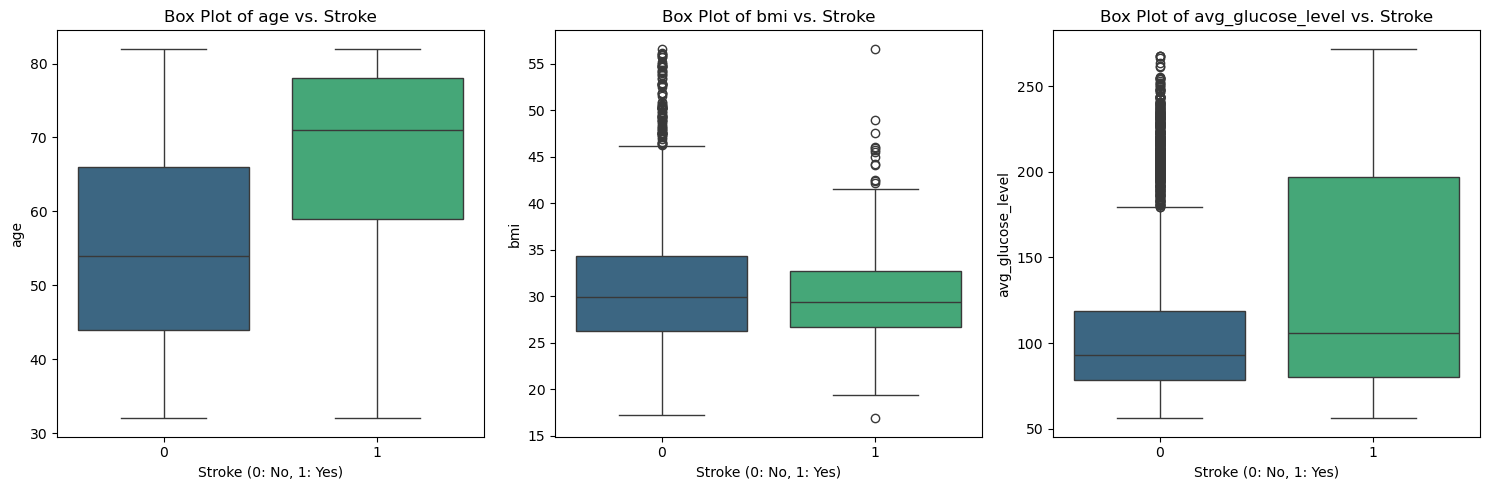

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Assuming 'df_stroke' is your DataFrame

numerical_features = ['age', 'bmi', 'avg_glucose_level']

# Create subplots for each numerical feature
fig, axes = plt.subplots(1, len(numerical_features), figsize=(15, 5))  # 1 row, 3 columns

# Iterate through numerical features and create box plots
for i, feature in enumerate(numerical_features):
    # Create box plot using seaborn
    sns.boxplot(x='stroke', y=feature, data=df_stroke, ax=axes[i], palette='viridis')

    # Set plot title and labels
    axes[i].set_title(f'Box Plot of {feature} vs. Stroke')
    axes[i].set_xlabel('Stroke (0: No, 1: Yes)')
    axes[i].set_ylabel(feature)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [218]:
import plotly.graph_objects as go
import pandas as pd

# Assuming your current DataFrame is named df_stroke

# Create bins for age
bins_age = [df_stroke['age'].min() - 1, 45, 65, df_stroke['age'].max() + 1]
labels_age = ['Younger', 'Middle-Aged', 'Older']
df_stroke['age_group'] = pd.cut(df_stroke['age'], bins=bins_age, labels=labels_age, right=False).astype(str)

# Create bins for avg_glucose_level
bins_glucose = [df_stroke['avg_glucose_level'].min() - 1, 100, 150, df_stroke['avg_glucose_level'].max() + 1]
labels_glucose = ['Normal Glucose', 'Elevated Glucose', 'High Glucose']
print(f"Glucose Bins: {bins_glucose}")
df_stroke['glucose_level'] = pd.cut(df_stroke['avg_glucose_level'], bins=bins_glucose, labels=labels_glucose, right=False).astype(str)

# Simplify heart risk
df_stroke['heart_risk_simplified'] = df_stroke['heart_risk'].map({0: 'No Heart Risk', 1: 'Heart Risk'}).astype(str)

# Create a Sankey Diagram
sankey_data = {
    'source': [],
    'target': [],
    'value': [],
    'label': []
}

# Nodes (unique categories)
nodes = sorted(list(df_stroke['age_group'].unique()) +
               list(df_stroke['glucose_level'].unique()) +
               list(df_stroke['heart_risk_simplified'].unique()) +
               ['Stroke', 'No Stroke'])
sankey_data['label'] = nodes

# Links (flows)
for age_group_val in df_stroke['age_group'].unique():
    for glucose_level_val in df_stroke['glucose_level'].unique():
        for heart_risk_val in df_stroke['heart_risk_simplified'].unique():
            for stroke_val in [0, 1]:
                count = len(df_stroke[
                    (df_stroke['age_group'] == age_group_val) &
                    (df_stroke['glucose_level'] == glucose_level_val) &
                    (df_stroke['heart_risk_simplified'] == heart_risk_val) &
                    (df_stroke['stroke'] == stroke_val)
                ])
                if count > 0:
                    sankey_data['source'].append(nodes.index(age_group_val))
                    sankey_data['source'].append(nodes.index(glucose_level_val))
                    sankey_data['source'].append(nodes.index(heart_risk_val))

                    if stroke_val == 1:
                        sankey_data['target'].append(nodes.index('Stroke'))
                    else:
                        sankey_data['target'].append(nodes.index('No Stroke'))

                    sankey_data['value'].append(count)

                    sankey_data['target'].append(nodes.index('Stroke') if stroke_val == 1 else nodes.index('No Stroke'))
                    sankey_data['source'].append(nodes.index(glucose_level_val))
                    sankey_data['value'].append(count)

                    sankey_data['target'].append(nodes.index('Stroke') if stroke_val == 1 else nodes.index('No Stroke'))
                    sankey_data['source'].append(nodes.index(heart_risk_val))
                    sankey_data['value'].append(count)

# Create the Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=sankey_data['label']
    ),
    link=dict(
        source=sankey_data['source'],
        target=sankey_data['target'],
        value=sankey_data['value']
    ))])

fig.show()

Glucose Bins: [55.11, 100, 150, 272.74]


In [219]:
# Parallel Categories Diagram
import plotly.express as px
import pandas as pd

# Assuming your current DataFrame is named df_stroke

# Create bins for age
bins_age = [df_stroke['age'].min() - 1, 45, 65, df_stroke['age'].max() + 1]
labels_age = ['Younger', 'Middle-Aged', 'Older']
df_stroke['age_group'] = pd.cut(df_stroke['age'], bins=bins_age, labels=labels_age, right=False).astype(str)

# Create bins for avg_glucose_level
bins_glucose = [df_stroke['avg_glucose_level'].min() - 1, 100, 150, df_stroke['avg_glucose_level'].max() + 1]
labels_glucose = ['Normal Glucose', 'Elevated Glucose', 'High Glucose']
df_stroke['glucose_level'] = pd.cut(df_stroke['avg_glucose_level'], bins=bins_glucose, labels=labels_glucose, right=False).astype(str)

# Simplify heart risk
df_stroke['heart_risk_simplified'] = df_stroke['heart_risk'].map({0: 'No Heart Risk', 1: 'Heart Risk'}).astype(str)

# Select the three factors and the target variable
parallel_categories_features = [
    'age_group',
    'glucose_level',
    'heart_risk_simplified',
    'stroke'
]

# Create a parallel categories diagram
fig = px.parallel_categories(
    df_stroke[parallel_categories_features],
    color="stroke",
    labels={
        "age_group": "Age Group",
        "glucose_level": "Glucose Level",
        "heart_risk_simplified": "Heart Risk",
        "stroke": "Stroke"
    },
    color_continuous_scale=px.colors.sequential.Inferno,
)

fig.show()

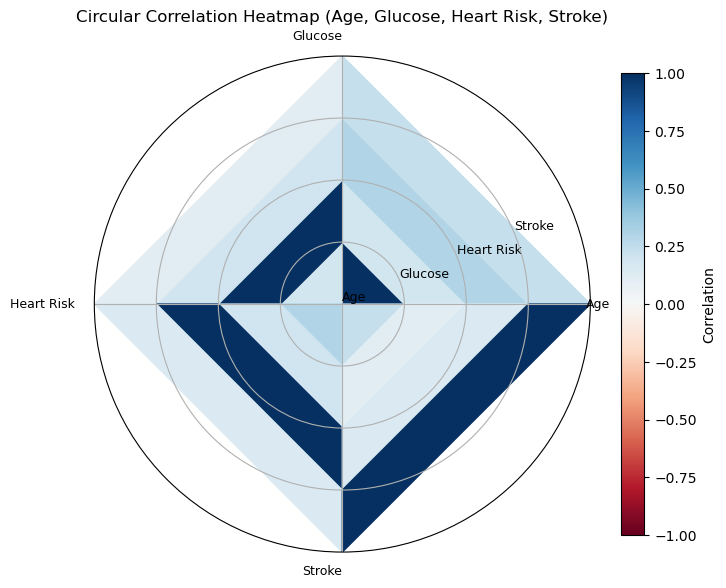

In [220]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from sklearn.preprocessing import LabelEncoder

# Assuming your current DataFrame is named df_stroke

# Create a copy of the DataFrame
df_encoded = df_stroke.copy()

# Encode categorical variables using LabelEncoder
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Create the 'heart_risk' variable if it doesn't exist
if 'heart_risk' not in df_encoded.columns:
    df_encoded['heart_risk'] = (df_encoded['hypertension'] | df_encoded['heart_disease']).astype(int)

# Select the three specified factors and 'stroke'
selected_columns = ['age', 'avg_glucose_level', 'heart_risk', 'stroke']
df_selected = df_encoded[selected_columns].copy()

# Calculate correlation matrix
correlation_matrix = df_selected.corr()

# Number of variables and angles
numerical_columns = df_selected.columns.tolist()
num_vars = len(numerical_columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Create circular heatmap
for i in range(num_vars):
    for j in range(num_vars):
        angle_start = angles[i]
        angle_end = angles[i + 1]
        radius_start = j
        radius_end = j + 1

        # Create a polygon for the cell
        vertices = [
            (angle_start, radius_start),
            (angle_end, radius_start),
            (angle_end, radius_end),
            (angle_start, radius_end),
            (angle_start, radius_start),  # Close the polygon
        ]

        # Get correlation value and color
        correlation = correlation_matrix.iloc[i, j]
        cmap = plt.cm.RdBu  # Red-blue colormap
        norm = Normalize(vmin=-1, vmax=1)
        color = cmap(norm(correlation))

        # Plot the cell
        polygon = plt.Polygon(vertices, closed=True, color=color)
        ax.add_patch(polygon)

# Create custom short labels
short_labels = []
for col in numerical_columns:
    if col == 'age':
        short_labels.append('Age')
    elif col == 'avg_glucose_level':
        short_labels.append('Glucose')
    elif col == 'heart_risk':
        short_labels.append('Heart Risk')
    elif col == 'stroke':
        short_labels.append('Stroke')
    else:
        short_labels.append(col)  # Keep original if not matched

ax.set_xticks(angles[:-1])
ax.set_xticklabels(short_labels, rotation=45, ha='right', fontsize=9)
ax.set_yticks(np.arange(num_vars))
ax.set_yticklabels(short_labels, fontsize=9)
ax.set_ylim(0, num_vars)

# Add colorbar
sm = ScalarMappable(cmap=plt.cm.RdBu, norm=Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.75)
cbar.set_label('Correlation')

plt.title('Circular Correlation Heatmap (Age, Glucose, Heart Risk, Stroke)')
plt.show()

In [222]:
#Heart Disease
print (df_hd.dtypes)

gender                     object
age                       float64
hypertension                int64
heart_disease               int64
ever_married               object
work_type                  object
Residence_type             object
avg_glucose_level         float64
bmi                       float64
smoking_status             object
stroke                      int64
gender_encoded              int64
ever_married_encoded        int64
work_type_encoded           int64
Residence_type_encoded      int64
smoking_status_encoded      int64
Age_temp                    int64
avg_glucose_level_temp      int64
dtype: object


In [232]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = df_heart_disease_full[col].astype('category')

print(df_heart_disease_full.dtypes)

gender                    category
age                        float64
hypertension                 int64
heart_disease                int64
ever_married              category
work_type                 category
Residence_type            category
avg_glucose_level          float64
bmi                        float64
smoking_status            category
stroke                       int64
gender_encoded               int64
ever_married_encoded         int32
work_type_encoded            int32
Residence_type_encoded       int32
smoking_status_encoded       int32
Age_temp                     int64
avg_glucose_level_temp       int64
dtype: object


In [233]:
df['heart_risk'] = (df['hypertension'] | df['stroke']).astype(int)

# Verify the result
print(df[['hypertension', 'stroke', 'heart_risk']].head(10))

   hypertension  stroke  heart_risk
0             0       1           1
1             0       1           1
2             0       1           1
3             0       1           1
4             1       1           1
5             0       1           1
6             1       1           1
7             0       1           1
8             0       1           1
9             0       1           1


In [236]:


df_heart_disease_full['heart_risk'] = (df_heart_disease_full['hypertension'] | df_heart_disease_full['stroke']).astype(int)

print(df_heart_disease_full[['hypertension', 'stroke', 'heart_risk']].head(10))

   hypertension  stroke  heart_risk
0             0       1           1
1             0       1           1
2             0       1           1
3             0       1           1
4             1       1           1
5             0       1           1
6             1       1           1
7             0       1           1
8             0       1           1
9             0       1           1


In [241]:
import pandas as pd
from scipy.stats import chi2_contingency


# Select your categorical features
categorical_features = [
    'gender_encoded',
    'hypertension',
    'stroke',
    'ever_married_encoded',
    'work_type_encoded',
    'Residence_type_encoded',
    'smoking_status_encoded',
    'heart_risk'
]

chi2_results_list = []

# Perform chi-square test for each categorical feature against 'heart disease'
for feature in categorical_features:
    contingency_table = pd.crosstab(df_heart_disease_full[feature], df_heart_disease_full['heart_disease'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results_list.append({'Feature': feature, 'Chi-square': chi2, 'P-value': p, 'Degrees of Freedom': dof})

# Convert results to a Pandas DataFrame
chi2_table = pd.DataFrame(chi2_results_list)

# Format the 'P-value' column to display as a float with a certain number of decimal places
pd.options.display.float_format = '{:.6f}'.format  # Display floats with 6 decimal places

# Sort the table by Chi-square statistic (optional)
chi2_table_sorted = chi2_table.sort_values(by='Chi-square', ascending=False)

# Display the table
print(chi2_table_sorted)

# To reset the float formatting to default (optional)
# pd.reset_option('display.float_format')

                  Feature  Chi-square  P-value  Degrees of Freedom
7              heart_risk   59.518010 0.000000                   1
2                  stroke   48.486441 0.000000                   1
0          gender_encoded   41.668182 0.000000                   1
1            hypertension   25.182245 0.000001                   1
4       work_type_encoded   12.548810 0.001884                   2
6  smoking_status_encoded   12.276205 0.006494                   3
3    ever_married_encoded    0.289938 0.590260                   1
5  Residence_type_encoded    0.000000 1.000000                   1


In [242]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming 'df_heart_disease' is your DataFrame

numerical_features = ['age', 'bmi', 'avg_glucose_level']  # List of numerical features

results = {}  # Dictionary to store results

for feature in numerical_features:
   
    hd_data = df_heart_disease_full[df_heart_disease_full['heart_disease'] == 1][feature]
    no_stroke_data = df_heart_disease_full[df_heart_disease_full['heart_disease'] == 0][feature]

    # Perform the Mann-Whitney U test
    u_statistic, p_value = mannwhitneyu(stroke_data, no_stroke_data, alternative='two-sided')

    results[feature] = {'U Statistic': u_statistic, 'P-value': p_value}

# Print the results
for feature, values in results.items():
    print(f"Feature: {feature}")
    print(f"  Mann-Whitney U Statistic: {values['U Statistic']:.3f}")
    print(f"  P-value: {values['P-value']:.3f}")
    print("-" * 20)  # Separator for clarity

Feature: age
  Mann-Whitney U Statistic: 784590.000
  P-value: 0.000
--------------------
Feature: bmi
  Mann-Whitney U Statistic: 822263.000
  P-value: 0.000
--------------------
Feature: avg_glucose_level
  Mann-Whitney U Statistic: 491550.000
  P-value: 0.000
--------------------


In [ ]:
import plotly.graph_objects as go
import pandas as pd


df_hd = df_heart_disease_full.copy()

# Create bins for age
bins_age = [df_hd['age'].min() - 1, 45, 65, df_hd['age'].max() + 1]
labels_age = ['Younger', 'Middle-Aged', 'Older']
df_hd['age_group'] = pd.cut(df_hd['age'], bins=bins_age, labels=labels_age, right=False).astype(str)

# Create bins for bmi
bins_bmi = [df_hd['bmi'].min() - 1, 18.5, 25, 30, df_hd['bmi'].max() + 1]
labels_bmi = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
df_hd['bmi_group'] = pd.cut(df_hd['bmi'], bins=bins_bmi, labels=labels_bmi, right=False).astype(str)

# Create bins for avg_glucose_level
bins_glucose = [df_hd['avg_glucose_level'].min() - 1, 100, 150, df_hd['avg_glucose_level'].max() + 1]
labels_glucose = ['Normal Glucose', 'Elevated Glucose', 'High Glucose']
print(f"Glucose Bins: {bins_glucose}")
df_hd['glucose_level'] = pd.cut(df_hd['avg_glucose_level'], bins=bins_glucose, labels=labels_glucose, right=False).astype(str)

# Simplify heart risk
df_hd['heart_risk_simplified'] = df_hd['heart_risk'].map({0: 'No Heart Risk', 1: 'Heart Risk'}).astype(str)

# Simplify hypertension
df_hd['hypertension_simplified'] = df_hd['hypertension'].map({0: 'No Hypertension', 1: 'Hypertension'}).astype(str)

# Simplify stroke
df_hd['stroke_simplified'] = df_hd['stroke'].map({0: 'No Stroke History', 1: 'Stroke History'}).astype(str)

# Simplify gender
df_hd['gender_simplified'] = df_hd['gender'].astype(str)

# Simplify work type
df_hd['work_type_simplified'] = df_hd['work_type'].astype(str)

# Simplify smoking status
df_hd['smoking_status_simplified'] = df_hd['smoking_status'].astype(str)

# Create a Sankey Diagram
sankey_data = {
    'source': [],
    'target': [],
    'value': [],
    'label': []
}

# Nodes (unique categories)
nodes = sorted(list(df_hd['age_group'].unique()) +
               list(df_hd['bmi_group'].unique()) +
               list(df_hd['glucose_level'].unique()) +
               list(df_hd['heart_risk_simplified'].unique()) +
               list(df_hd['hypertension_simplified'].unique()) +
               list(df_hd['stroke_simplified'].unique()) +
               list(df_hd['gender_simplified'].unique()) +
               list(df_hd['work_type_simplified'].unique()) +
               list(df_hd['smoking_status_simplified'].unique()) +
               ['No Heart Disease', 'Heart Disease'])
sankey_data['label'] = nodes

# Links (flows)
unique_age = df_hd['age_group'].unique()
unique_bmi = df_hd['bmi_group'].unique()
unique_glucose = df_hd['glucose_level'].unique()
unique_heart_risk = df_hd['heart_risk_simplified'].unique()
unique_hypertension = df_hd['hypertension_simplified'].unique()
unique_stroke = df_hd['stroke_simplified'].unique()
unique_gender = df_hd['gender_simplified'].unique()
unique_work_type = df_hd['work_type_simplified'].unique()
unique_smoking = df_hd['smoking_status_simplified'].unique()

for age in unique_age:
    for bmi in unique_bmi:
        for glucose in unique_glucose:
            for heart_risk in unique_heart_risk:
                for hypertension in unique_hypertension:
                    for stroke in unique_stroke:
                        for gender in unique_gender:
                            for work_type in unique_work_type:
                                for smoking in unique_smoking:
                                    for heart_disease in [0, 1]:
                                        count = len(df_hd[
                                            (df_hd['age_group'] == age) &
                                            (df_hd['bmi_group'] == bmi) &
                                            (df_hd['glucose_level'] == glucose) &
                                            (df_hd['heart_risk_simplified'] == heart_risk) &
                                            (df_hd['hypertension_simplified'] == hypertension) &
                                            (df_hd['stroke_simplified'] == stroke) &
                                            (df_hd['gender_simplified'] == gender) &
                                            (df_hd['work_type_simplified'] == work_type) &
                                            (df_hd['smoking_status_simplified'] == smoking) &
                                            (df_hd['heart_disease'] == heart_disease)
                                        ])
                                        if count > 0:
                                            source_nodes = [
                                                nodes.index(age),
                                                nodes.index(bmi),
                                                nodes.index(glucose),
                                                nodes.index(heart_risk),
                                                nodes.index(hypertension),
                                                nodes.index(stroke),
                                                nodes.index(gender),
                                                nodes.index(work_type),
                                                nodes.index(smoking)
                                            ]
                                            target_node = nodes.index('Heart Disease') if heart_disease == 1 else nodes.index('No Heart Disease')

                                            for source in source_nodes:
                                                sankey_data['source'].append(source)
                                                sankey_data['target'].append(target_node)
                                                sankey_data['value'].append(count)

# Create the Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=sankey_data['label']
    ),
    link=dict(
        source=sankey_data['source'],
        target=sankey_data['target'],
        value=sankey_data['value']
    ))])

fig.update_layout(title_text="Sankey Diagram of Heart Disease Predictors", font_size=10)
fig.show()

Glucose Bins: [55.31, 100, 150, 272.74]


stroke                      int64
hypertension                int64
work_type_encoded           int32
smoking_status_encoded      int32
age                       float64
bmi                       float64
avg_glucose_level         float64
gender_encoded              int64
heart_disease               int64
dtype: object


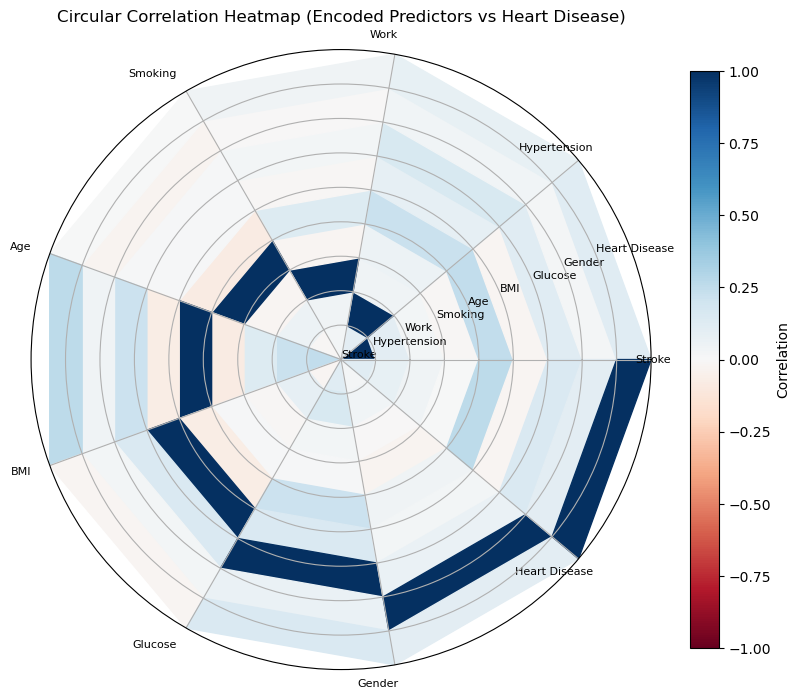

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from sklearn.preprocessing import LabelEncoder


df_hd_encoded = df_heart_disease_full.copy()

# Assuming categorical columns are already encoded with names like:
# 'gender_encoded', 'work_type_encoded', 'smoking_status_encoded'

# Select the predictor variables and the target variable ('heart_disease')
predictor_columns = [
    'stroke',  # Assuming this is already numerical (0/1)
    'hypertension',  # Assuming this is already numerical (0/1)
    'work_type_encoded',
    'smoking_status_encoded',
    'age',
    'bmi',
    'avg_glucose_level',
    'gender_encoded'
]
target_column = 'heart_disease'

# Ensure all predictor columns exist in the DataFrame
available_columns = df_hd_encoded.columns
selected_columns = [col for col in predictor_columns if col in available_columns]
selected_columns.append(target_column)

df_selected = df_hd_encoded[selected_columns].copy()

# Print data types to verify they are numerical
print(df_selected.dtypes)

# Calculate correlation matrix
correlation_matrix = df_selected.corr()

# Number of variables and angles
numerical_columns = df_selected.columns.tolist()
num_vars = len(numerical_columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Create circular heatmap
for i in range(num_vars):
    for j in range(num_vars):
        angle_start = angles[i]
        angle_end = angles[i + 1]
        radius_start = j
        radius_end = j + 1

        # Create a polygon for the cell
        vertices = [
            (angle_start, radius_start),
            (angle_end, radius_start),
            (angle_end, radius_end),
            (angle_start, radius_end),
            (angle_start, radius_start),  # Close the polygon
        ]

        # Get correlation value and color
        correlation = correlation_matrix.iloc[i, j]
        cmap = plt.cm.RdBu  # Red-blue colormap
        norm = Normalize(vmin=-1, vmax=1)
        color = cmap(norm(correlation))

        # Plot the cell
        polygon = plt.Polygon(vertices, closed=True, color=color)
        ax.add_patch(polygon)

# Create custom short labels
short_labels = []
for col in numerical_columns:
    if col == 'stroke':
        short_labels.append('Stroke')
    elif col == 'hypertension':
        short_labels.append('Hypertension')
    elif col == 'work_type_encoded':
        short_labels.append('Work')
    elif col == 'smoking_status_encoded':
        short_labels.append('Smoking')
    elif col == 'age':
        short_labels.append('Age')
    elif col == 'bmi':
        short_labels.append('BMI')
    elif col == 'avg_glucose_level':
        short_labels.append('Glucose')
    elif col == 'gender_encoded':
        short_labels.append('Gender')
    elif col == 'heart_disease':
        short_labels.append('Heart Disease')
    else:
        short_labels.append(col)  # Keep original if not matched

ax.set_xticks(angles[:-1])
ax.set_xticklabels(short_labels, rotation=45, ha='right', fontsize=8)
ax.set_yticks(np.arange(num_vars))
ax.set_yticklabels(short_labels, fontsize=8)
ax.set_ylim(0, num_vars)

# Add colorbar
sm = ScalarMappable(cmap=plt.cm.RdBu, norm=Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.75)
cbar.set_label('Correlation')
plt.title('Circular Correlation Heatmap (Encoded Predictors vs Heart Disease)')
plt.show()

Final predictors used: ['stroke', 'hypertension', 'work_type_encoded', 'smoking_status_encoded', 'age', 'bmi', 'avg_glucose_level']


C:\Users\poula\AppData\Local\Temp\ipykernel_19536\2281850983.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




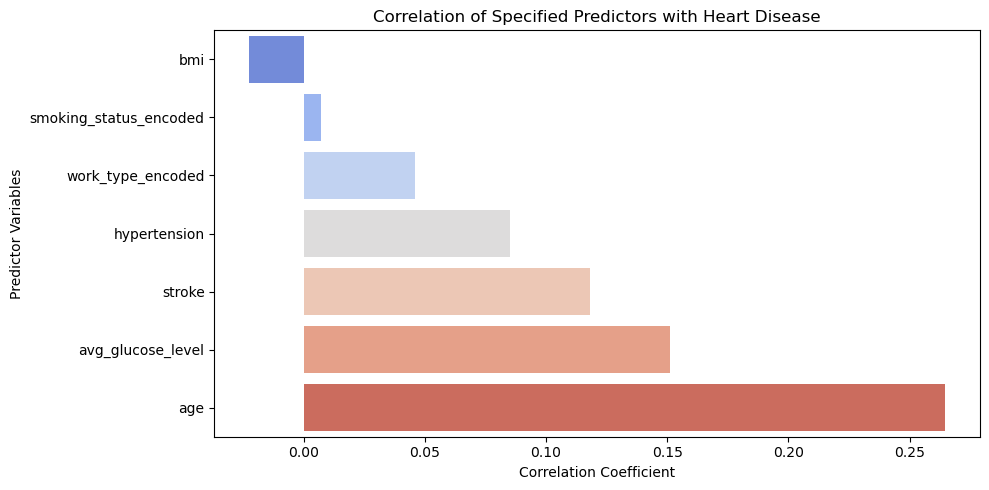

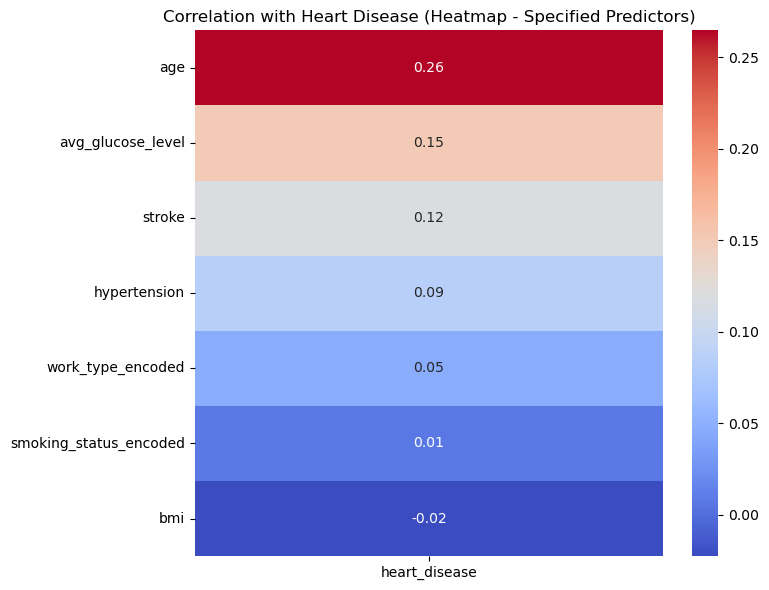

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_heart_disease_full

df = df_heart_disease_full.copy()

# Encode categorical variables if not already encoded
from sklearn.preprocessing import LabelEncoder
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# List of predictor variables (using the provided encoded names)
predictors = [
    'stroke',
    'hypertension',
    'work_type_encoded',
    'smoking_status_encoded',
    'age',
    'bmi',
    'avg_glucose_level'
]

target = 'heart_disease'

# Check if all specified predictor columns exist and are numerical
available_numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
final_predictors = [p for p in predictors if p in available_numerical_cols and p != target]

print("Final predictors used:", final_predictors)

if final_predictors:
    # 1. Bar Plot of Correlation Coefficients
    correlations_bar = df[final_predictors + [target]].corr()[target].drop(target).sort_values()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=correlations_bar.values, y=correlations_bar.index, palette='coolwarm')
    plt.title('Correlation of Specified Predictors with Heart Disease')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Predictor Variables')
    plt.tight_layout()
    plt.show()

    # 2. Heatmap of Correlation Matrix (focusing on specified variables and target)
    correlation_matrix_heatmap = df[final_predictors + [target]].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix_heatmap.loc[final_predictors, ['heart_disease']].sort_values(by='heart_disease', ascending=False),
                annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation with Heart Disease (Heatmap - Specified Predictors)')
    plt.tight_layout()
    plt.show()

else:
    print("No valid numerical predictor columns found among the specified variables.")